In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## we will  check for null values


In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
for i in df.columns:
    if df[i].dtype=='object':
        print(df[i].value_counts())
    print('\n')

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64




No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64




Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


No                     3095
Yes                    2422
No internet service    1526
Name: Devic

## finding some correlation

C:\python310\lib\site-packages\dython\nominal.py:149: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(


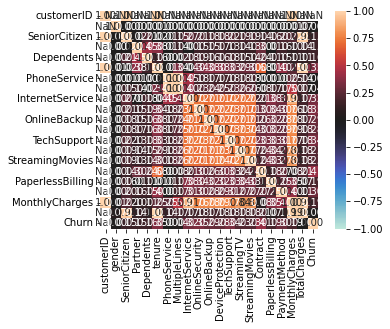

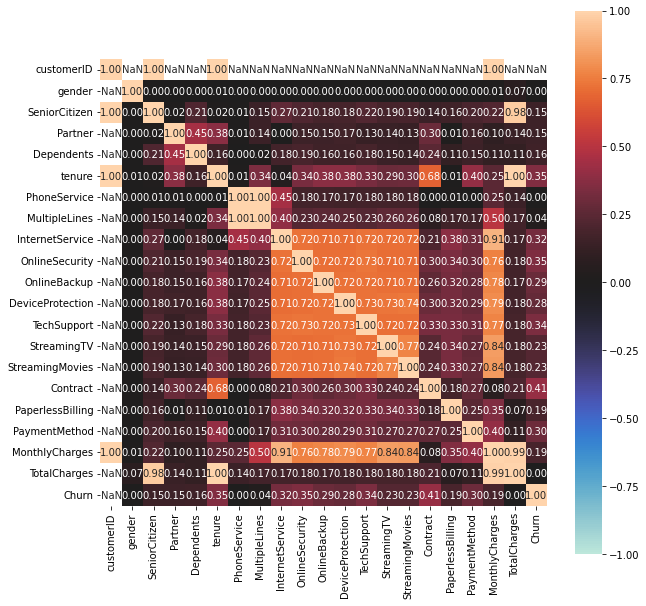

C:\Users\Admin\AppData\Local\Temp/ipykernel_5292/2687227243.py:13: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
gender,0.00,1.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.07,0.00
SeniorCitizen,1.00,0.00,1.00,0.02,0.21,0.02,0.01,0.15,0.27,0.21,0.18,0.18,0.22,0.19,0.19,0.14,0.16,0.20,0.22,0.98,0.15
Partner,0.00,0.00,0.02,1.00,0.45,0.38,0.01,0.14,0.00,0.15,0.15,0.17,0.13,0.14,0.13,0.30,0.01,0.16,0.10,0.14,0.15
Dependents,0.00,0.00,0.21,0.45,1.00,0.16,0.00,0.02,0.18,0.19,0.16,0.16,0.18,0.15,0.14,0.24,0.11,0.15,0.11,0.11,0.16
tenure,1.00,0.01,0.02,0.38,0.16,1.00,0.01,0.34,0.04,0.34,0.38,0.38,0.33,0.29,0.30,0.68,0.01,0.40,0.25,1.00,0.35
PhoneService,0.00,0.00,0.01,0.01,0.00,0.01,1.00,1.00,0.45,0.18,0.17,0.17,0.18,0.18,0.18,0.00,0.01,0.00,0.25,0.14,0.00
MultipleLines,0.00,0.00,0.15,0.14,0.02,0.34,1.00,1.00,0.40,0.23,0.24,0.25,0.23,0.26,0.26,0.08,0.17,0.17,0.50,0.17,0.04
InternetService,0.00,0.00,0.27,0.00,0.18,0.04,0.45,0.40,1.00,0.72,0.71,0.71,0.72,0.72,0.72,0.21,0.38,0.31,0.91,0.17,0.32
OnlineSecurity,0.00,0.00,0.21,0.15,0.19,0.34,0.18,0.23,0.72,1.00,0.72,0.72,0.73,0.71,0.71,0.30,0.34,0.30,0.76,0.18,0.35


In [9]:
from dython.nominal import associations

from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features


associations(df, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', nan_strategy='REPLACE', nan_replace_value='DEFAULT_REPLACE_VALUE', ax=None, figsize=None, annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, title=None, filename=None)

complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(10,10))

df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

## From the heat map above we can see 6 top most features that affect the target column the most

In [10]:
cols_to_keep = ['tenure','InternetService','OnlineSecurity','TechSupport','Contract','PaymentMethod']
X=df[cols_to_keep]
X.head()

,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaymentMethod
0,1,DSL,No,No,Month-to-month,Electronic check
1,34,DSL,Yes,No,One year,Mailed check
2,2,DSL,Yes,No,Month-to-month,Mailed check
3,45,DSL,Yes,Yes,One year,Bank transfer (automatic)
4,2,Fiber optic,No,No,Month-to-month,Electronic check


In [11]:
for i in X.columns:
    if X[i].dtype=='object':
        print(X[i].value_counts())
    print('\n')



Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64




In [12]:
df['InternetService'].replace(['Fiber optic', 'DSL','No'],[2,1,0], inplace=True)
df['OnlineSecurity'].replace(['No', 'Yes','No internet service'],[0, 1,2], inplace=True)
df['TechSupport'].replace(['No', 'Yes','No internet service'],[0, 1,2], inplace=True)
df['Contract'].replace(['Month-to-month', 'Two year','One year'],[0, 1,2], inplace=True)
df['PaymentMethod'].replace(['Electronic check', 'Mailed check','Bank transfer (automatic)','Credit card (automatic)'],[0, 1,2,3], inplace=True)

In [13]:
cols_to_keep = ['tenure','InternetService','OnlineSecurity','TechSupport','Contract','PaymentMethod']
X=df[cols_to_keep]
X.head()

,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaymentMethod
0,1,1,0,0,0,0
1,34,1,1,0,2,1
2,2,1,1,0,0,1
3,45,1,1,1,2,2
4,2,2,0,0,0,0


In [14]:
# from sklearn import preprocessing

# x = X.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df1 = pd.DataFrame(x_scaled)
# X=df1
# X

In [15]:
df['Churn'].replace(['No','Yes'],[0,1], inplace=True)
col_for_y=['Churn']
Y=df[col_for_y]
Y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


## Applying train-test split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [17]:
X_train.shape

(4718, 6)

In [18]:
X_test.shape

(2325, 6)

## importing models

In [19]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train,y_train)


C:\python310\lib\site-packages\sklearn\utils\validation.py:1095: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train, y_train)

C:\python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

## Prediction on training data

In [21]:
from sklearn.metrics import accuracy_score

pred_model1_training_data=model1.predict(X_train)
accuracy_model1_training_data=accuracy_score(y_train,pred_model1_training_data)
accuracy_model1_training_data

0.7969478592623993

In [22]:
pred_model2_training_data=model2.predict(X_train)
accuracy_model2_training_data=accuracy_score(y_train,pred_model2_training_data)
accuracy_model2_training_data

0.8234421364985163

## Prediction on testing data

In [23]:
pred_model1_testing_data=model1.predict(X_test)
accuracy_model1_testing_data=accuracy_score(y_test,pred_model1_testing_data)
accuracy_model1_testing_data

0.8004301075268817

In [24]:
pred_model2_testing_data=model2.predict(X_test)
accuracy_model2_testing_data=accuracy_score(y_test,pred_model2_testing_data)
accuracy_model2_testing_data

0.7470967741935484

In [29]:
pred_model2_testing_data=model2.predict([[124,1,0,1,2,0]])
pred_model2_testing_data

C:\python310\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

## Saving the model


In [30]:
import pickle

In [31]:
filename='trained_model.sav'
pickle.dump(model1,open(filename,'wb'))

## Loading the saved model

In [32]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [33]:
pred_model2_testing_data=loaded_model.predict([[124,1,0,1,2,0]])
pred_model2_testing_data

C:\python310\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)